In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df = pd.read_csv('/Users/hungcucu/Documents/usth/fundamental_datascience/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing value found 


In [72]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age: The dataset includes only adults, ranging from 18 to 64 years old, with a significant portion concentrated in the middle-age group (25 to 53 years old).

BMI: The dataset emphasizes overweight individuals. Only about 25% of the population has a BMI below 26.3, indicating that the majority fall within the overweight or obese categories.

Children: Most individuals in the dataset either have no children or between one and two children, reflecting common household structures.

Insurance Charges: The median insurance charge is lower than the mean, suggesting a right-skewed distribution. This indicates the presence of a small number of cases with extremely high costs, making insurance charges highly variable. In other words, while many individuals pay moderate charges, some face disproportionately high expenses.

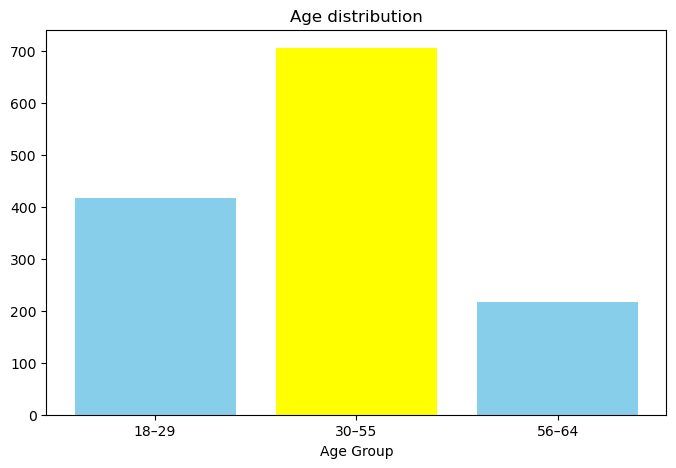

In [73]:
bins = [18,29,55,64]
labels = ["18–29", "30–55", "56–64"]
df['age_group'] = pd.cut(df['age'], bins= bins, labels= labels,include_lowest=True)
height = [417, 705, 216]
colors = ['skyblue', 'yellow', 'skyblue']
plt.figure(figsize=(8,5))
plt.bar(x=labels, height=height, color =colors)
plt.xlabel('Age Group')
plt.title('Age distribution')
plt.xticks(rotation=0)
plt.show()

The distribution is skewed toward middle-age adults. However the younger is also sizable, show that the dataset doesn't just focus on the older individuals.

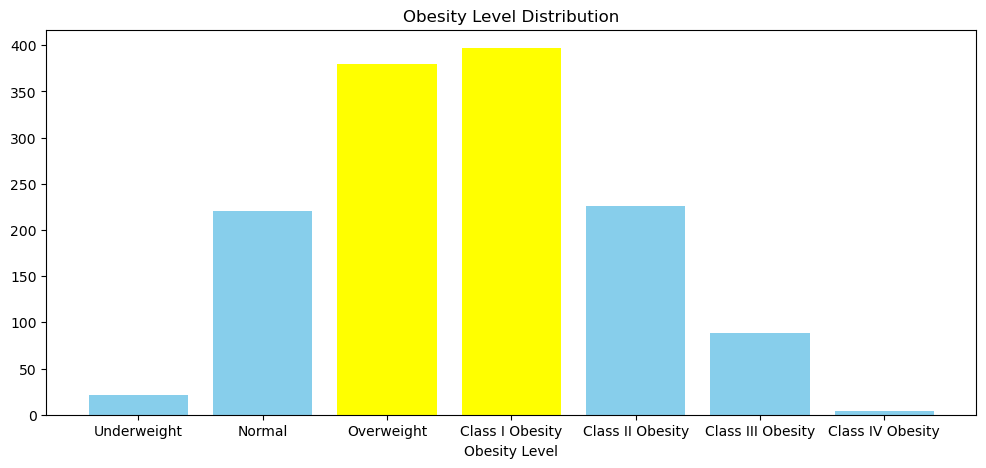

In [74]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 49.9, float('inf')]
bmi_labels = [
    "Underweight",
    "Normal",
    "Overweight",
    "Class I Obesity",
    "Class II Obesity",
    "Class III Obesity",
    "Class IV Obesity"
]
df['obesity_level']= pd.cut(df['age'],bins=bmi_bins,labels=bmi_labels,right=True)
heights = [21, 221, 380, 397, 226, 89, 4]
colors = ["skyblue",
    "skyblue",
    "yellow",
    "yellow",
    "skyblue",
    "skyblue",
    "skyblue"]
plt.figure(figsize=(12,5))
plt.bar(x = bmi_labels, height = heights, color = colors)
plt.xlabel('Obesity Level')
plt.title('Obesity Level Distribution')
plt.xticks(rotation=0)
plt.show()



The largest groups are “Overweight” and “Class 1 Obesity”, together making up the majority of the dataset.

The “Normal” group is considerably smaller than the overweight/obesity groups, showing that only a minority fall within the recommended BMI range.

While overweight and Class 1 obesity dominate, there are still noticeable counts in Class 2 and Class 3 obesity.
Class 4 obesity, and Underweight is very rare, indicating that extremely high or low BMI values are outliers.

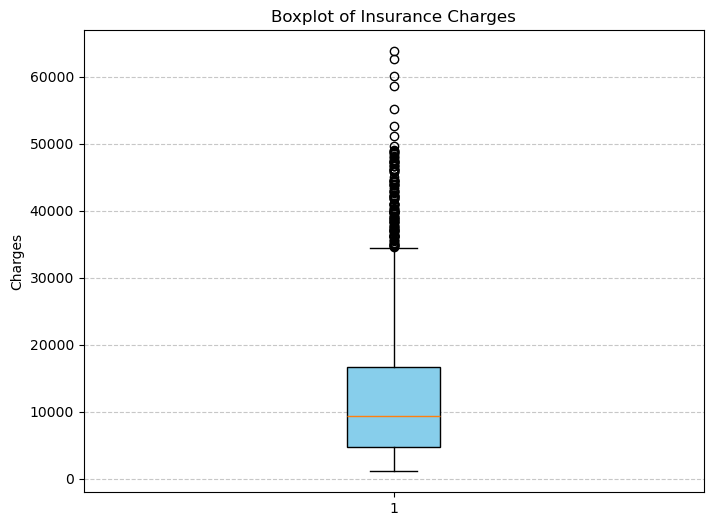

In [75]:

plt.figure(figsize=(8,6))
plt.boxplot(df["charges"], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

plt.ylabel("Charges")
plt.title("Boxplot of Insurance Charges")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [76]:
charges = df["charges"]

Q1 = np.percentile(charges, 25)
Q3 = np.percentile(charges, 75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_outlier_charge = df[df['charges']> upper_whisker]
print(df_outlier_charge.shape)



(139, 9)


139 people that pay more than 34489.35$

The boxplot is right-skewed.

This indicates that while most people pay moderate charges, a smaller group pays very high charges.

There are a lot of high outliers, with charges going beyond 60,000 USD.

These likely represent individuals with very expensive treatments, often driven by factors like smoking, age, or chronic conditions.


In [77]:
df


,age,sex,bmi,children,smoker,region,charges,age_group,obesity_level
0,19,female,27.900,0,yes,southwest,16884.92400,18–29,Normal
1,18,male,33.770,1,no,southeast,1725.55230,18–29,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,18–29,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,30–55,Class I Obesity
4,32,male,28.880,0,no,northwest,3866.85520,30–55,Class I Obesity
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30–55,Class IV Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18–29,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,18–29,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,18–29,Normal


In [78]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

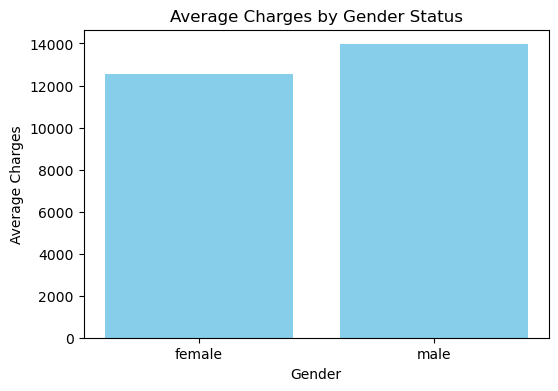

In [94]:
charge_sums = df.groupby('sex')['charges'].mean()
plt.figure(figsize=(6,4))
plt.bar(charge_sums.index,charge_sums.values,color = 'skyblue')

plt.xlabel("Gender")
plt.ylabel("Average Charges")
plt.title("Average Charges by Gender Status")
plt.show()

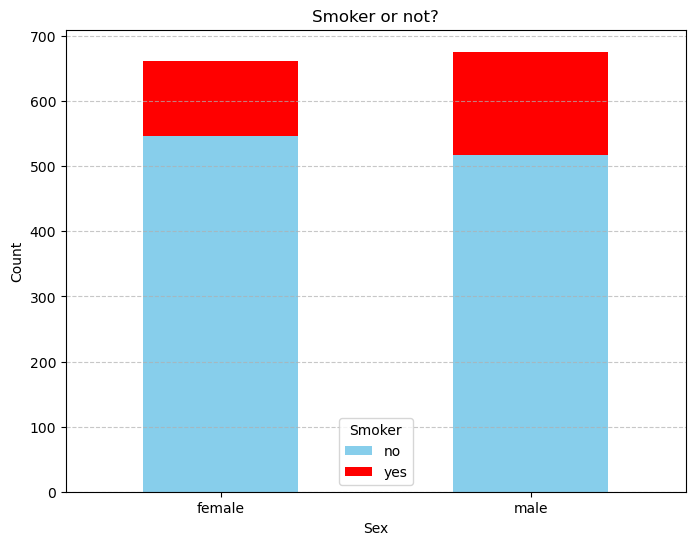

In [ ]:
counts = pd.crosstab(df['sex'], df['smoker'])
counts.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue', 'red'])
plt.title('Smoker or not?')
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.grid(axis='y',linestyle='--',alpha= 0.7)
plt.show()

/var/folders/m8/hs_hzlfn7bjf_v56pl9yjsf00000gn/T/ipykernel_45067/2982051740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_sum_bmi = df.groupby('obesity_level')['charges'].mean()


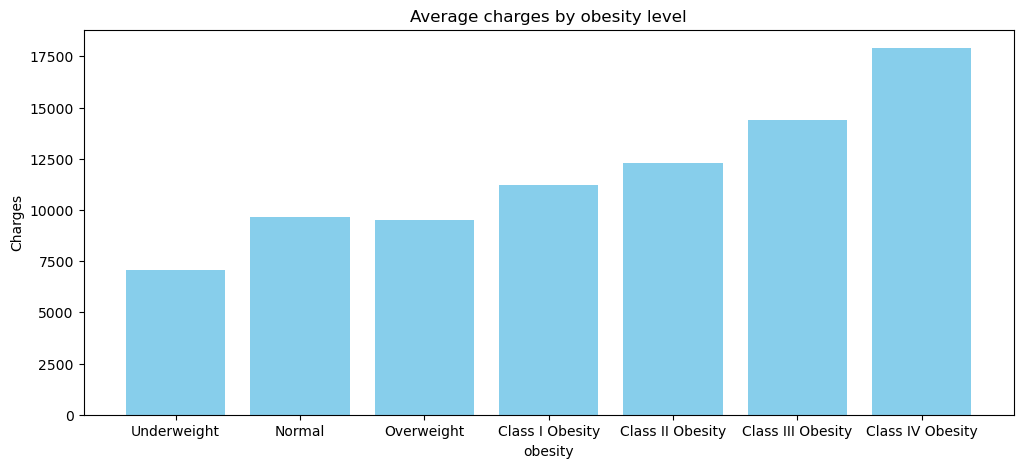

In [ ]:
charges_sum_bmi = df.groupby('obesity_level')['charges'].mean()
plt.figure(figsize=(12,5))
plt.bar(charges_sum_bmi.index,charges_sum_bmi.values,color = 'skyblue')
plt.title('Average charges by obesity level')
plt.xlabel('obesity')
plt.xticks(rotation = 0)
plt.ylabel('Charges')
plt.grid(axis='y',linestyle='--',alpha= 0.7)
plt.show()

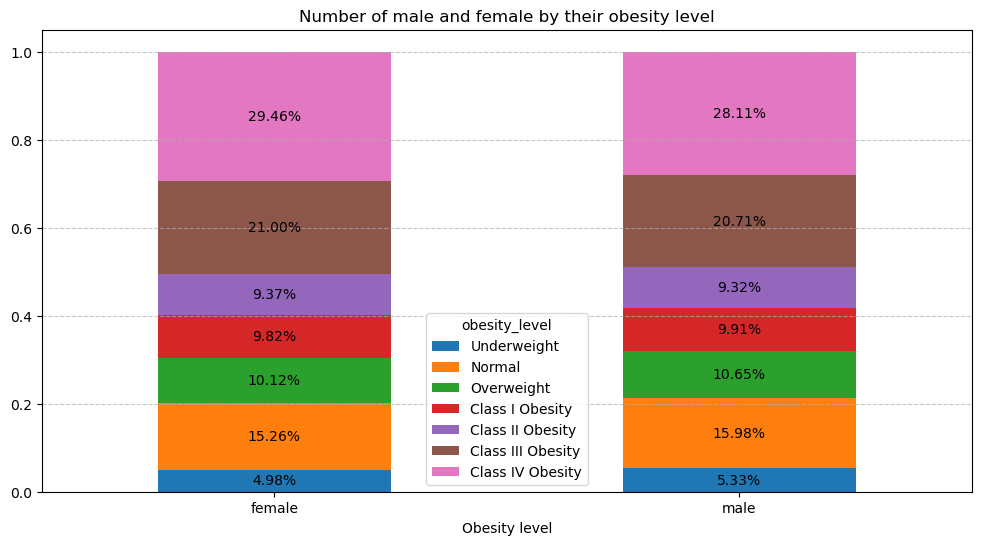

In [91]:
counts = pd.crosstab(df['sex'], df['obesity_level'])
ax = proportion_obesity.plot(kind='bar', stacked=True, figsize=(12,6))

for i, sex in enumerate(proportion_obesity.index):
    bottom = 0
    for obesity_level in proportion_obesity.columns:
        value = proportion_obesity.loc[sex, obesity_level]
        if value > 0:
            ax.text(i, bottom + value/2, f'{value*100:.2f}%', ha='center', va='center', color='black', fontsize=10)
            bottom += value

plt.title('Number of male and female by their obesity level')
plt.xlabel('Obesity level')
plt.xticks(rotation = 0)
plt.grid(axis='y',linestyle='--',alpha= 0.7)
plt.legend(title='obesity_level')
plt.show()

The most dominant category for both males and females is Class IV Obesity, accounting for about 28–29% of individuals

This suggests that extreme obesity is a major health concern across genders.
The distribution patterns for males and females are very similar

This indicates that obesity affects both genders almost equally in this dataset

Less than 5% of both males and females are underweight.
This shows that malnutrition is not a widespread issue in this dataset compared to obesity

Overall, the dataset points to a serious public health challenge, with obesity (especially severe obesity) being the predominant condition across both genders, while normal weight and underweight categories are relatively uncommon.

In [83]:
proportion_obesity = df.groupby('sex')['obesity_level'].value_counts(normalize = True).unstack()
print(proportion_obesity)

obesity_level  Underweight    Normal  Overweight  Class I Obesity  \
sex                                                                 
female            0.049849  0.152568    0.101208         0.098187   
male              0.053254  0.159763    0.106509         0.099112   

obesity_level  Class II Obesity  Class III Obesity  Class IV Obesity  
sex                                                                   
female                 0.093656           0.209970          0.294562  
male                   0.093195           0.207101          0.281065  


In [84]:
df


,age,sex,bmi,children,smoker,region,charges,age_group,obesity_level
0,19,female,27.900,0,yes,southwest,16884.92400,18–29,Normal
1,18,male,33.770,1,no,southeast,1725.55230,18–29,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,18–29,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,30–55,Class I Obesity
4,32,male,28.880,0,no,northwest,3866.85520,30–55,Class I Obesity
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30–55,Class IV Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18–29,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,18–29,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,18–29,Normal


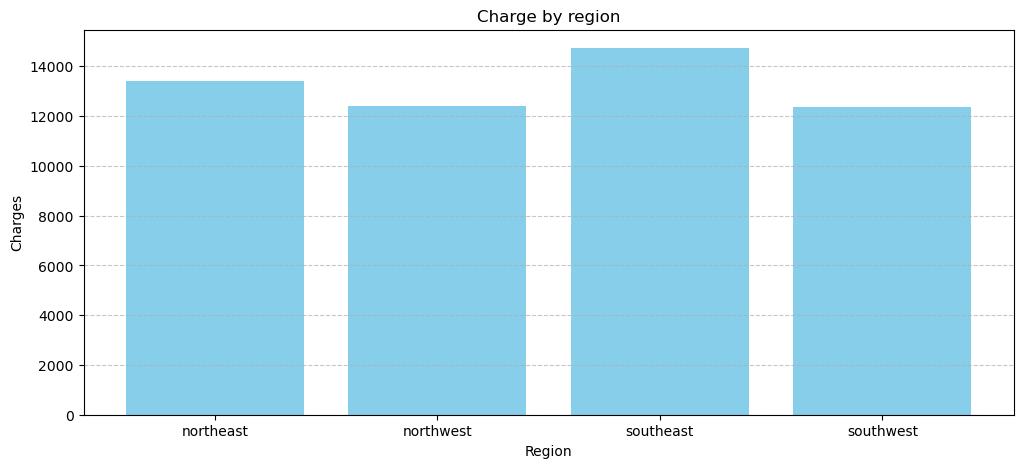

In [92]:
charges_sum_region = df.groupby('region')['charges'].mean()
plt.figure(figsize=(12,5))
plt.bar(charges_sum_region.index,charges_sum_region.values,color = 'skyblue')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.grid(axis='y',linestyle='--',alpha= 0.7)
plt.title('Charge by region')
plt.show()

Reason southeast people have to face the highest health insurance cost




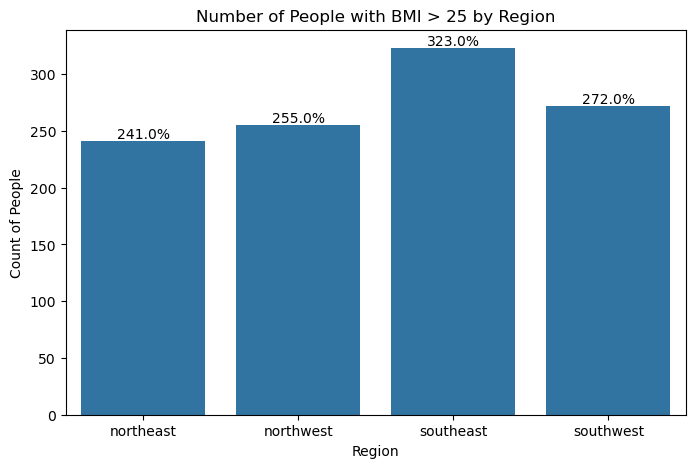

In [117]:
df_over25 = df[df["bmi"] > 25]
region_total = df.groupby("region")["bmi"].count()
region_counts = df_over25.groupby("region")["bmi"].count().reset_index()
region_rate = (region_counts / region_total).reset_index()
plt.figure(figsize=(8,5))
ax=sns.barplot(data=region_counts, x="region", y="bmi")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # format with 1 decimal place
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.title("Number of People with BMI > 25 by Region")
plt.xlabel("Region")
plt.ylabel("Count of People")
plt.xticks(rotation=0)
plt.show()

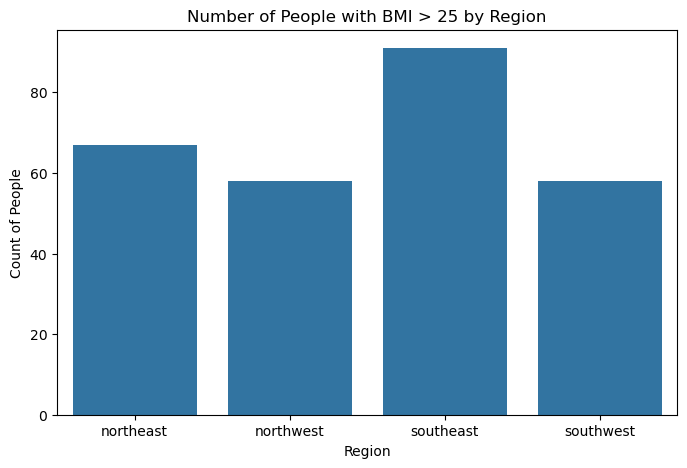

In [ ]:
df_over25 = df[df["smoker"] =='yes']
region_counts = df_over25.groupby("region")["smoker"].count().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=region_counts, x="region", y="smoker")
plt.title("Number of People with BMI > 25 by Region")
plt.xlabel("Region")
plt.ylabel("Count of People")
plt.xticks(rotation=0)
plt.show()

In [113]:
region_counts

,region,count
0,northeast,67
1,northwest,58
2,southeast,91
3,southwest,58
